In [92]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.datasets import load_breast_cancer, make_regression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [3]:
# load breast cancer dataset.

In [57]:
breast = load_breast_cancer()

In [58]:
x = breast.data
y = breast.target

In [59]:
# split the dataset into training and test set (8:2)

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)

In [61]:
# declare decision tree and fit it to training set.
# (criterion="gini", max_depth=None, min_samples_split=2, min_samples_leaf=1)

In [62]:
tree1 = DecisionTreeClassifier(
    criterion="gini", 
    max_depth=None, 
    min_samples_split=2, 
    min_samples_leaf=1
)
tree1.fit(x_train, y_train)

DecisionTreeClassifier()

In [63]:
# make predictions

In [64]:
y_train_pred = tree1.predict(x_train)
y_train_prob = tree1.predict_proba(x_train)

In [65]:
y_test_pred = tree1.predict(x_test)
y_test_prob = tree1.predict_proba(x_test)

In [66]:
tree1.score(x_train, y_train)

1.0

In [67]:
tree1.score(x_test, y_test)

0.9385964912280702

In [68]:
# declare new decision tree and fit it to training set.
tree2 = DecisionTreeClassifier(criterion="entropy", max_depth=4, min_samples_leaf=10)
tree2.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=10)

In [69]:
# make predictions

In [70]:
y_train_pred2 = tree2.predict(x_train)
y_train_prob2 = tree2.predict_proba(x_train)

In [71]:
y_test_pred2 = tree2.predict(x_test)
y_test_prob2 = tree2.predict_proba(x_test)

In [72]:
tree2.score(x_train, y_train)

0.9560439560439561

In [73]:
tree2.score(x_test, y_test)

0.9385964912280702

In [21]:
# plot tree structures

[Text(0.555, 0.9285714285714286, 'x[7] <= 0.051\ngini = 0.468\nsamples = 455\nvalue = [170, 285]'),
 Text(0.37, 0.7857142857142857, 'x[23] <= 960.5\ngini = 0.089\nsamples = 277\nvalue = [13, 264]'),
 Text(0.26, 0.6428571428571429, 'x[23] <= 766.45\ngini = 0.044\nsamples = 268\nvalue = [6, 262]'),
 Text(0.16, 0.5, 'x[13] <= 47.035\ngini = 0.016\nsamples = 243\nvalue = [2, 241]'),
 Text(0.08, 0.35714285714285715, 'x[21] <= 33.35\ngini = 0.008\nsamples = 241\nvalue = [1, 240]'),
 Text(0.04, 0.21428571428571427, 'gini = 0.0\nsamples = 225\nvalue = [0, 225]'),
 Text(0.12, 0.21428571428571427, 'x[21] <= 33.56\ngini = 0.117\nsamples = 16\nvalue = [1, 15]'),
 Text(0.08, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.16, 0.07142857142857142, 'gini = 0.0\nsamples = 15\nvalue = [0, 15]'),
 Text(0.24, 0.35714285714285715, 'x[13] <= 51.38\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.2, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.28, 0.21

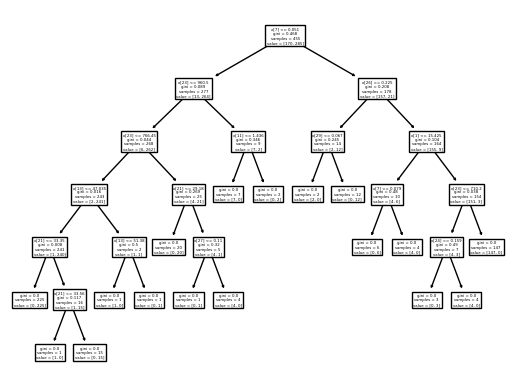

In [22]:
tree.plot_tree(tree1)

In [23]:
print("Feature names:", breast.feature_names)
print("Class names:", breast.target_names)

Feature names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Class names: ['malignant' 'benign']


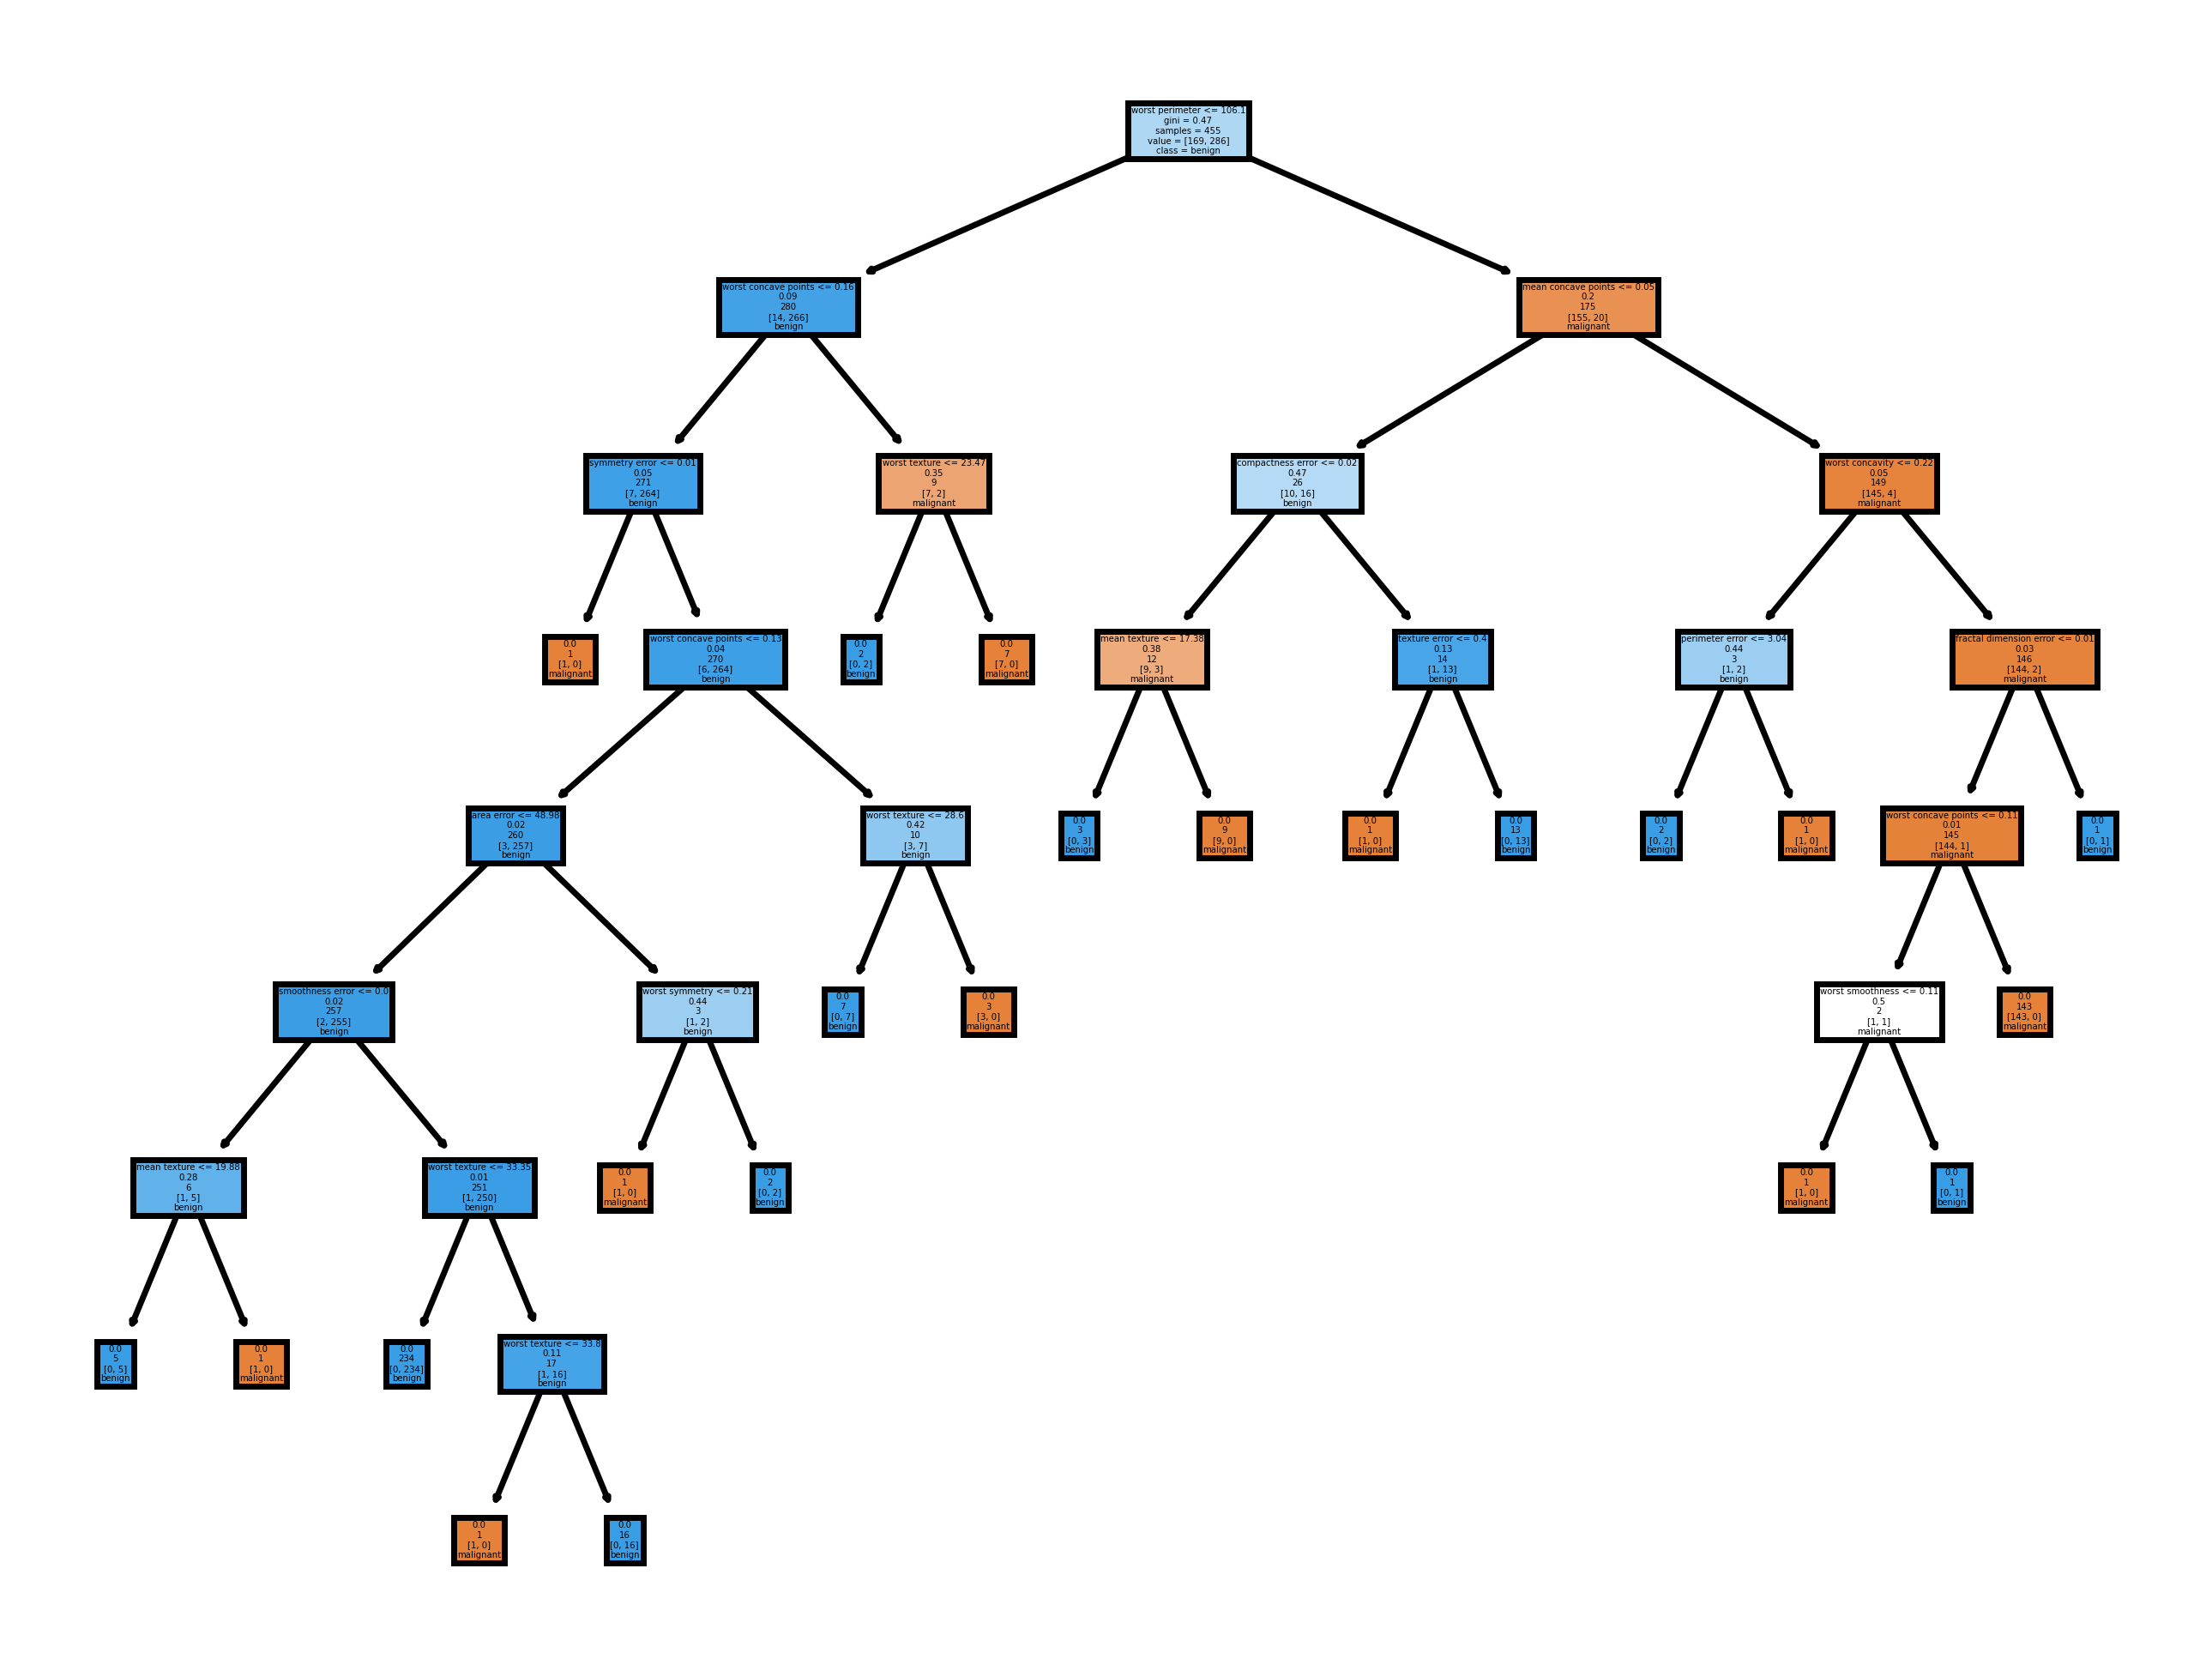

In [90]:
plt.figure(dpi=500)
tree.plot_tree(
    tree1, 
    max_depth=None, 
    feature_names=breast.feature_names, 
    class_names=breast.target_names, 
    filled=True, 
    precision=2
)
plt.savefig("test.png")
plt.show()

In [25]:
tree1.feature_importances_

array([0.        , 0.02971858, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.73223683, 0.        , 0.        ,
       0.        , 0.01460842, 0.        , 0.00927551, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.03339344, 0.        , 0.06309023, 0.01609907,
       0.        , 0.07796595, 0.0075129 , 0.        , 0.01609907])

In [26]:
# regression tree

In [27]:
reg_data = make_regression(
    n_samples=1000, 
    n_features=15, 
    n_informative=10, 
    n_targets=1, 
    noise=1.0
)

In [28]:
x_reg = reg_data[0]
y_reg = reg_data[1]

In [29]:
x_reg.shape

(1000, 15)

In [30]:
y_reg.shape

(1000,)

In [31]:
x_reg_train, x_reg_test, y_reg_train, y_reg_test = train_test_split(
    x_reg, y_reg, test_size=0.2, shuffle=True
)

In [32]:
reg_tree = DecisionTreeRegressor(criterion="squared_error")
reg_tree.fit(x_reg_train, y_reg_train)

DecisionTreeRegressor()

In [33]:
y_reg_test_pred = reg_tree.predict(x_reg_test)

In [34]:
# Cost complexity pruning

In [35]:
# classifiaction tree

In [99]:
titanic = pd.read_csv("./datasets/Titanic.csv")

In [100]:
titanic

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,1
2,3,female,26.0,0,0,7.9250,S,1
3,1,female,35.0,1,0,53.1000,S,1
4,3,male,35.0,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...
884,2,male,27.0,0,0,13.0000,S,0
885,1,female,19.0,0,0,30.0000,S,1
886,3,female,30.0,1,2,23.4500,S,0
887,1,male,26.0,0,0,30.0000,C,1


In [102]:
x = titanic.iloc[:, :-1]
y = titanic.iloc[:, -1]

In [106]:
x_proc = pd.get_dummies(x, columns=["Sex", "Embarked"], drop_first=True)

In [107]:
x_train, x_test, y_train, y_test = train_test_split(x_proc, y, test_size=0.2, shuffle=True)

In [108]:
path = tree1.cost_complexity_pruning_path(x_train, y_train)

In [109]:
alphas, impurities = path.ccp_alphas, path.impurities

In [110]:
alphas

array([0.00000000e+00, 5.02310629e-05, 6.69747505e-05, 8.03697006e-05,
       1.66531812e-04, 2.34411627e-04, 3.51617440e-04, 4.68823254e-04,
       4.68823254e-04, 4.68823254e-04, 4.68823254e-04, 4.68823254e-04,
       5.02310629e-04, 6.02772755e-04, 6.49959511e-04, 6.56352555e-04,
       6.57189739e-04, 6.90212012e-04, 7.03234880e-04, 7.50117206e-04,
       7.50117206e-04, 7.73558368e-04, 8.38089446e-04, 8.43881857e-04,
       9.26070624e-04, 9.37646507e-04, 9.37646507e-04, 9.37646507e-04,
       9.37646507e-04, 9.37646507e-04, 9.37646507e-04, 9.37646507e-04,
       9.54390195e-04, 1.05485232e-03, 1.05485232e-03, 1.09556592e-03,
       1.12517581e-03, 1.14861697e-03, 1.17205813e-03, 1.19641259e-03,
       1.20554551e-03, 1.23066104e-03, 1.25019534e-03, 1.25577657e-03,
       1.28926395e-03, 1.31702969e-03, 1.32373625e-03, 1.32373625e-03,
       1.38561003e-03, 1.40646976e-03, 1.40646976e-03, 1.47344451e-03,
       1.53433065e-03, 1.70194660e-03, 1.72612198e-03, 1.83210347e-03,
      

In [111]:
impurities

array([0.02505525, 0.02510549, 0.02517246, 0.0253332 , 0.02583279,
       0.02606721, 0.02677044, 0.02723926, 0.02770809, 0.02817691,
       0.02911456, 0.02958338, 0.03008569, 0.03129124, 0.03259116,
       0.03324751, 0.03587627, 0.03863712, 0.03934035, 0.04084058,
       0.04234082, 0.04543505, 0.04794932, 0.0487932 , 0.05157141,
       0.05344671, 0.055322  , 0.05719729, 0.05907259, 0.06094788,
       0.06188553, 0.06282317, 0.06473195, 0.06895136, 0.07106107,
       0.07544333, 0.07769368, 0.0788423 , 0.08118642, 0.08357924,
       0.08599033, 0.08845165, 0.09095204, 0.09220782, 0.09478635,
       0.10268853, 0.105336  , 0.10798347, 0.13431006, 0.13571653,
       0.137123  , 0.14006989, 0.14467288, 0.14977872, 0.15150485,
       0.15700116, 0.16075174, 0.16262703, 0.16450233, 0.1704095 ,
       0.18048667, 0.18251266, 0.18671751, 0.19117641, 0.19352053,
       0.19586464, 0.21004066, 0.21716218, 0.22454615, 0.2270585 ,
       0.23244189, 0.23802997, 0.24765845, 0.25121467, 0.26231

In [112]:
clfs = []
for alpha in alphas:
    clf = DecisionTreeClassifier(ccp_alpha=alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)
    print(clf.tree_.node_count,alpha)

355 0.0
349 5.023106288929054e-05
343 6.697475051905448e-05
345 8.036970062286599e-05
333 0.00016653181210143195
337 0.00023441162681669004
335 0.00035161744022503506
317 0.0004688232536333801
315 0.0004688232536333801
317 0.0004688232536333801
317 0.0004688232536333801
323 0.0004688232536333801
315 0.0005023106288929084
309 0.0006027727546714893
307 0.0006499595107190047
307 0.0006563525550867329
303 0.0006571897394682204
303 0.0006902120122935869
287 0.0007032348804500701
277 0.0007501172058134084
279 0.0007501172058134084
271 0.0007735583684950772
265 0.0008380894456843831
265 0.000843881856540084
261 0.0009260706244609987
241 0.0009376465072667604
241 0.0009376465072667604
239 0.0009376465072667604
241 0.0009376465072667604
243 0.0009376465072667604
243 0.0009376465072667606
239 0.0009376465072667606
231 0.0009543901948965243
219 0.0010548523206751054
223 0.0010548523206751054
219 0.0010955659190169523
211 0.0011251758087201123
209 0.0011486169714017818
205 0.0011720581340834506
19

In [113]:
# draw plot of impurity vs. alpha

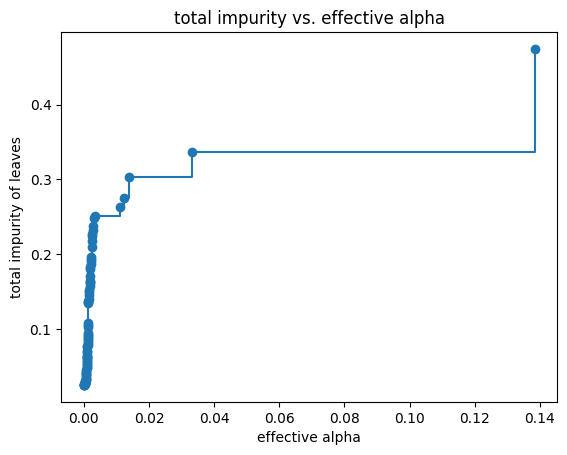

In [114]:
plt.figure()
plt.plot(alphas, impurities, marker="o", drawstyle="steps-post")
plt.xlabel("effective alpha")
plt.ylabel("total impurity of leaves")
plt.title("total impurity vs. effective alpha")
plt.show()

In [115]:
# we can see that there is only increasing pattern.

In [116]:
node_counts = []
depths = []
for tree_clf in clfs:
    node_counts.append(tree_clf.tree_.node_count)
    depths.append(tree_clf.tree_.max_depth)

In [117]:
# plot the number of nodes vs. alpha

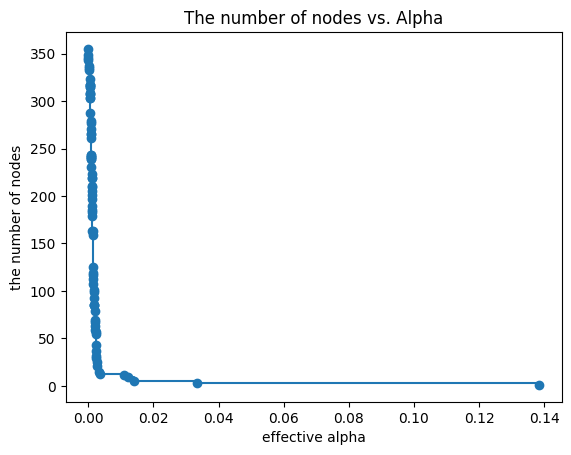

In [118]:
plt.figure()
plt.plot(alphas, node_counts, marker="o", drawstyle="steps-post")
plt.xlabel("effective alpha")
plt.ylabel("the number of nodes")
plt.title("The number of nodes vs. Alpha")
plt.show()

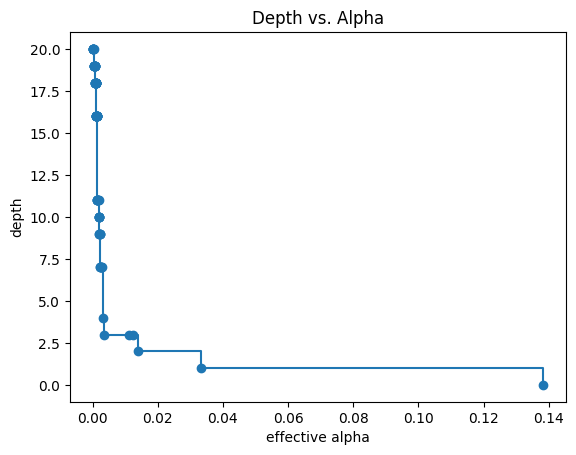

In [119]:
plt.figure()
plt.plot(alphas, depths, marker="o", drawstyle="steps-post")
plt.xlabel("effective alpha")
plt.ylabel("depth")
plt.title("Depth vs. Alpha")
plt.show()

In [120]:
train_scores = []
test_scores = []
for tree_clf in clfs:
    train_scores.append(tree_clf.score(x_train, y_train))
    test_scores.append(tree_clf.score(x_test, y_test))


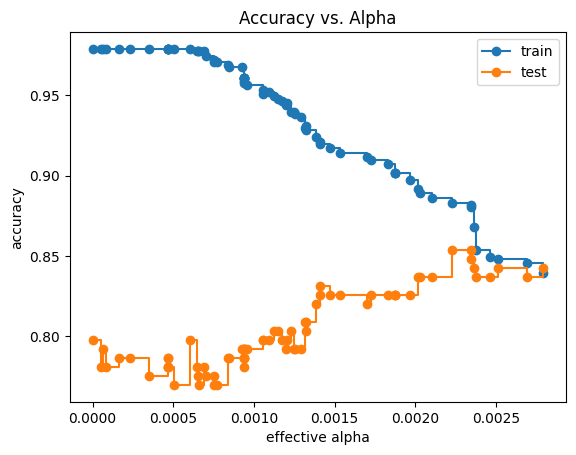

In [123]:
plt.figure()
plt.plot(alphas[:-7], train_scores[:-7], marker="o", drawstyle="steps-post", label="train")
plt.plot(alphas[:-7], test_scores[:-7], marker="o", drawstyle="steps-post", label="test")
plt.xlabel("effective alpha")
plt.ylabel("accuracy")
plt.title("Accuracy vs. Alpha")
plt.legend()
plt.show()